In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform

In [2]:
d = 2
n = 100
p = 2
r = 0.4
k = 3

Data shape (n,d): (100, 2, 3)


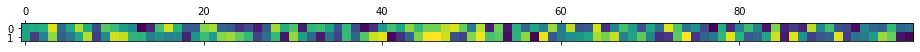

In [3]:
# generate n positions (hidden variables) in the [0,1]^d space
pos = np.random.uniform(0,1,(n,d,k))
_ = plt.matshow(np.transpose(pos[:,:,0]))
print('Data shape (n,d):', pos.shape)

In [4]:
%%time

# compute the pairwise distances
A = np.zeros((n,n,k))
for i in range(k):
    A[:,:,i] = squareform(pdist(pos[:,:,i], 'minkowski', p))
    # fill diagonal with zeros in place
    np.fill_diagonal(A[i,:,:], 0)

# filter with radius
A[A > r] = 0
A[A != 0] = 1

CPU times: user 3.67 ms, sys: 255 µs, total: 3.93 ms
Wall time: 3.21 ms


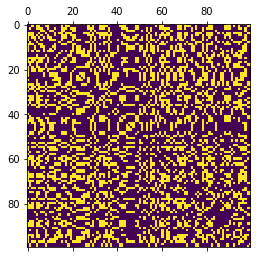

In [9]:
_ = plt.matshow(A[:,:,0])

In [6]:
%%time

graph = nx.random_geometric_graph(n, r, dim=d, p=p)

CPU times: user 4.49 ms, sys: 30 µs, total: 4.52 ms
Wall time: 4.27 ms
